In [58]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [151]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(GGally)


# Missing values

https://www.kaggle.com/mnassrib/telecom-churn-datasets

In [82]:
url_dataset = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
col_name = c('sex', 'length', 'diameter', 'height', 'whole_weight',
            'shucked_weight', 'viscera_weight', 'shell_weight', 'rings')
PATH <- "../datasets/Telecom Churn Dataset/churn-bigml-80.csv"
df <- read.csv(url_dataset, sep = ",", header = F, col.names = col_name)
head(df)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [83]:
colnames(df)

[1] "sex"            "length"         "diameter"       "height"        
[5] "whole_weight"   "shucked_weight" "viscera_weight" "shell_weight"  
[9] "rings"

In [84]:
dplyr::select_if(df, is.integer) %>% summary()

     rings       
 Min.   : 1.000  
 1st Qu.: 8.000  
 Median : 9.000  
 Mean   : 9.934  
 3rd Qu.:11.000  
 Max.   :29.000  

In [85]:
select_if(df, is.double) %>% summary()

     length         diameter          height        whole_weight   
 Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
 Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
 3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
 Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
 shucked_weight   viscera_weight    shell_weight   
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300  
 Median :0.3360   Median :0.1710   Median :0.2340  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.0050  

In [86]:
select_if(df, is.factor) %>% summary()

 sex     
 F:1307  
 I:1342  
 M:1528  

In [87]:
select_if(df, is.numeric) %>% 
    filter(diameter < 0.4)  %>%
    sapply(mean)

length       diameter         height   whole_weight shucked_weight 
    0.40593583     0.30887701     0.10481283     0.36673737     0.15841563 
viscera_weight   shell_weight          rings 
    0.07979887     0.11005615     8.07605466

`summarise()` ungrouping output (override with `.groups` argument)



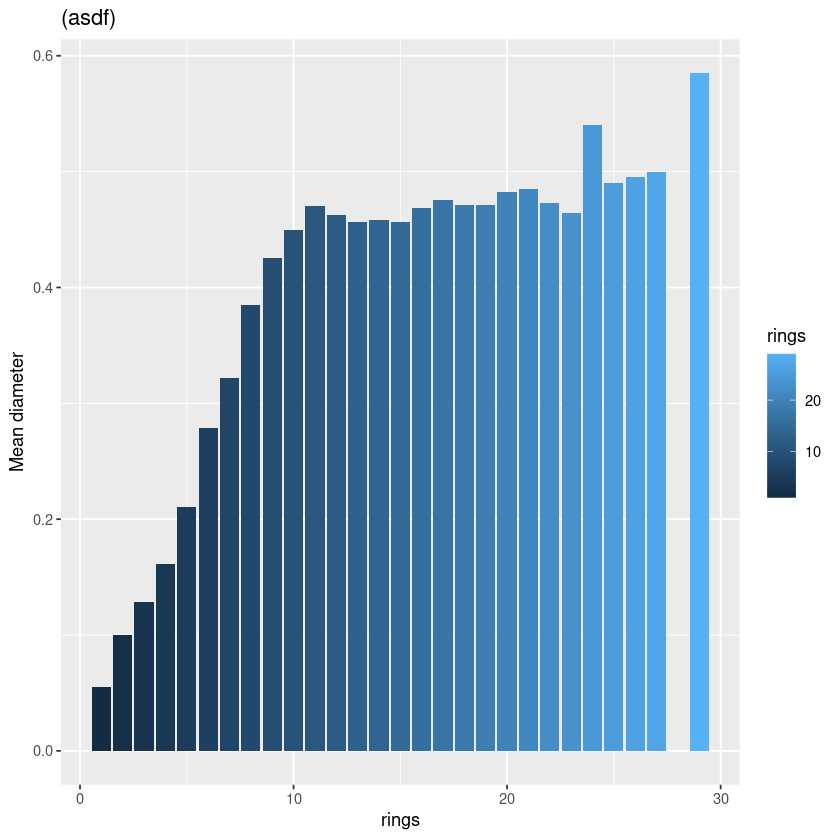

In [88]:
df %>%
    group_by(rings) %>%
    summarise(mean_diameter = mean(diameter),
              mean_length = mean(length)) %>%
    ggplot(aes(x=rings, y= mean_diameter, fill=rings, )) +
        geom_bar(stat = "identity") +
        #geom_line() + 
        labs(
            x = "rings",
            y = "Mean diameter",
            title = "(asdf)"
        )

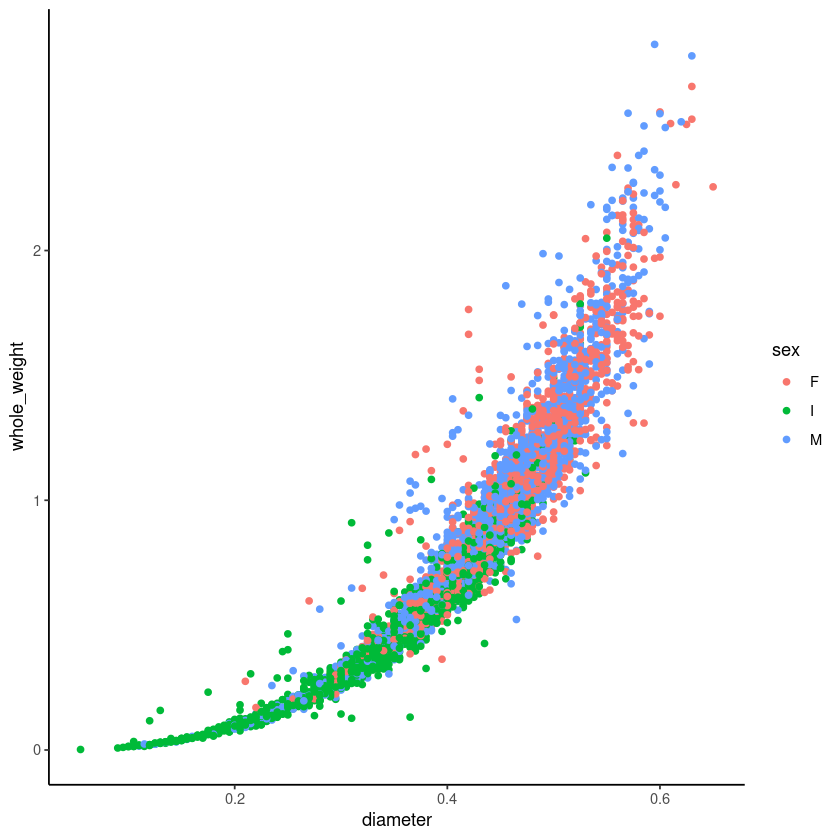

In [90]:
ggplot(churn, aes(x=diameter, y=whole_weight, color=sex)) + 
    geom_point() + 
    theme_classic()

`summarise()` ungrouping output (override with `.groups` argument)



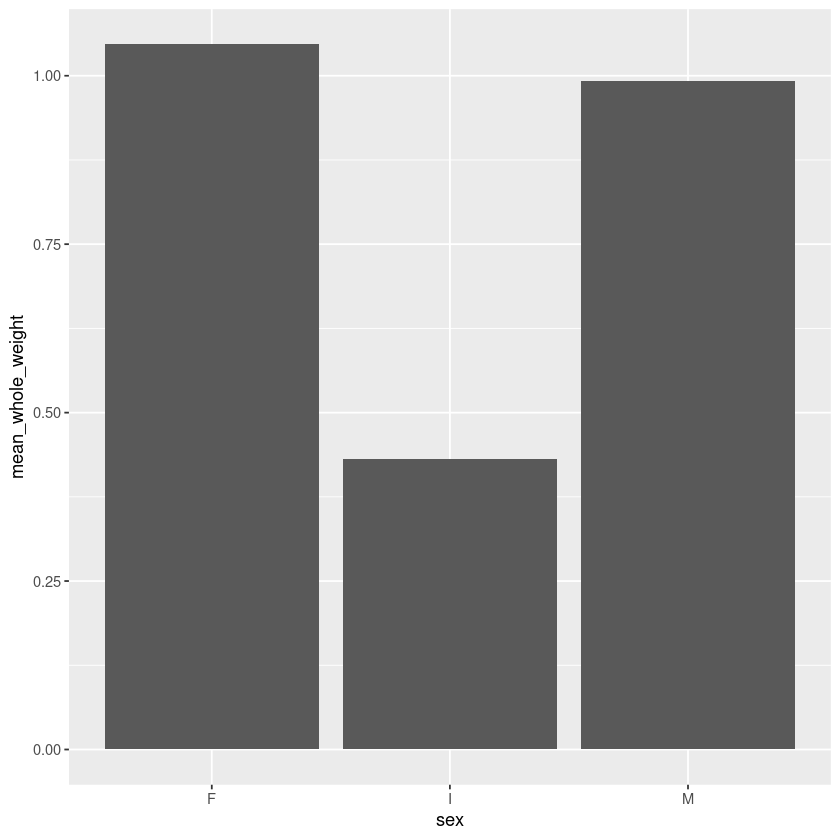

In [99]:
df %>%
    select(c(sex, whole_weight)) %>% 
    group_by(sex) %>%
    summarise(mean_whole_weight = mean(whole_weight)) %>%
    #ungroup() %>%
    arrange(sex) %>% 
     ggplot(aes(x=sex, y=mean_whole_weight)) + geom_bar(stat = 'Identity')

[ggpairs doc](https://www.rdocumentation.org/packages/GGally/versions/1.5.0/topics/ggpairs)

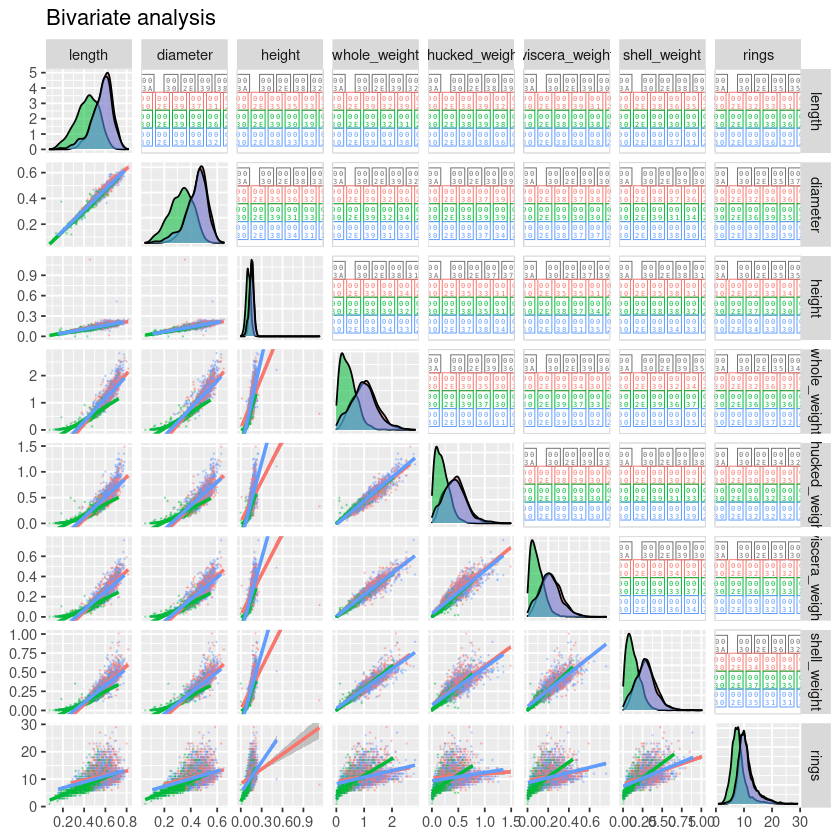

In [104]:
ggpairs(df,
        columns = c('length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'),
        title = "Bivariate analysis",
        upper = list(continuous = wrap("cor",size = 3)),
         lower = list(continuous = wrap("smooth", alpha = 0.3, size = 0.1)),
        mapping = aes(alpha = 0.5, color = sex)
        ) 

In [109]:
sample_n(df, 5)
sample_frac(df, 0.001)

sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
I,0.290,0.21,0.065,0.0970,0.0375,0.0220,0.030,6
M,0.620,0.48,0.165,1.0725,0.4815,0.2350,0.312,9
F,0.505,0.41,0.135,0.6570,0.2910,0.1330,0.195,15
F,0.460,0.35,0.115,0.4400,0.1900,0.1025,0.130,8
M,0.620,0.51,0.175,1.6150,0.5105,0.1920,0.675,12


sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
I,0.435,0.345,0.120,0.4475,0.2210,0.1120,0.125,7
I,0.550,0.440,0.165,0.8605,0.3120,0.1690,0.300,17
F,0.580,0.460,0.180,1.0515,0.4095,0.2595,0.276,8
I,0.565,0.430,0.135,0.8545,0.3210,0.1775,0.275,11


In [122]:
df %>%
    filter(sex == 'M', rings== 7) %>%
    select(ends_with('_weight'), sex) %>% 
    head()

,whole_weight,shucked_weight,viscera_weight,shell_weight,sex
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.2255,0.0995,0.0485,0.070,M
2,0.2555,0.0970,0.0430,0.100,M
3,0.3030,0.1335,0.0600,0.100,M
4,0.3850,0.1730,0.0915,0.110,M
5,0.4115,0.1800,0.1125,0.135,M
6,0.3785,0.1705,0.0800,0.100,M


In [149]:
df %>% 
    group_by(sex, rings) %>% 
    summarize(mean_diameter = mean(diameter)) %>% 
    arrange(desc(rings)) %>% 
    ungroup() %>% 
    head()

`summarise()` regrouping output by 'sex' (override with `.groups` argument)



sex,rings,mean_diameter
<fct>,<int>,<dbl>
F,29,0.585
F,27,0.465
M,27,0.535
M,26,0.495
F,25,0.490
F,24,0.540


In [150]:
df %>% 
    group_by(sex, rings) %>% 
    tally()  %>% 
    arrange(desc(n)) %>% 
    mutate(norm_count = 100*n/nrow(df)) %>% 
    head()


sex,rings,n,norm_count
<fct>,<int>,<int>,<dbl>
M,10,294,7.038544
M,9,278,6.655494
I,8,274,6.559732
I,7,267,6.392147
F,10,248,5.937276
F,9,238,5.697869


In [153]:
df %>% 
    group_by(sex, rings) %>% 
    summarize(mean_diameter = mean(diameter)) %>% 
    arrange(desc(rings)) %>% 
    ungroup() %>% 
    pivot_wider(names_from = sex, values_from = mean_diameter) %>% 
    head()

`summarise()` regrouping output by 'sex' (override with `.groups` argument)



rings,F,M,I
<int>,<dbl>,<dbl>,<dbl>
29,0.5850000,NA,NA
27,0.4650000,0.5350000,NA
26,NA,0.4950000,NA
25,0.4900000,NA,NA
24,0.5400000,0.5400000,NA
23,0.4666667,0.4583333,NA


In [156]:
df %>% 
    group_by(sex, rings) %>% 
    summarize(mean_diameter = mean(diameter)) %>% 
    arrange(desc(rings)) %>% 
    ungroup() %>% 
    pivot_wider(names_from = sex, values_from = mean_diameter) %>% 
    pivot_longer(cols = -rings, names_to = 'sex', values_to = 'mean_diameter') %>% 
    na.omit()
    head()

`summarise()` regrouping output by 'sex' (override with `.groups` argument)



rings,sex,mean_diameter
<int>,<chr>,<dbl>
29,F,0.5850000
27,F,0.4650000
27,M,0.5350000
26,M,0.4950000
25,F,0.4900000
24,F,0.5400000
24,M,0.5400000
23,F,0.4666667
23,M,0.4583333


ERROR: Error in head.default(): argument "x" is missing, with no default
